# Свертка данных. Ядерное сглаживание.

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1.5
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Исходные данные

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]


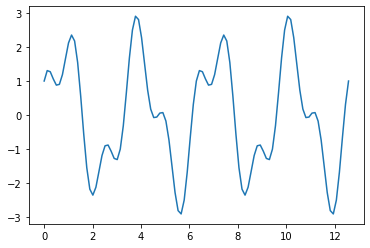

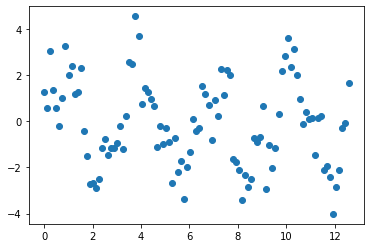

In [2]:
x = np.linspace(0, np.pi * 4, 101)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

n = len(x)

print (x/(np.pi * 2))

yd = np.zeros(len(x))

plt.plot(x, y)
Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta
y_av = np.sum(y)/len(x)

plt.figure ()

plt.plot (x, yd, 'o')

2 1.368211509500418 1.3682115095004177


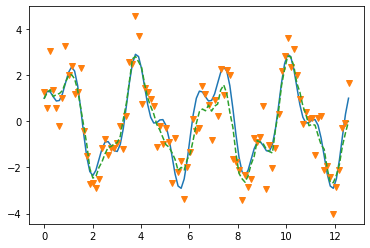

In [3]:
Conv = np.zeros ((len(x)))
W = np.zeros ((2*len(x)))

W [-2] = 1./5
W [-1] = 1./5.
W [0] = 1./5.
W [1] = 1./5.
W [2] = 1./5.

for i in range (0, n-1):
    
    Conv [i] = 0.
    
    for k in range (0, n-1):
        Conv[i] = Conv[i] + yd[k]*W[i-k]
        
for i in range (2, 3):
        print (i, Conv[i], np.sum(yd[(i-2):(i+3)])/5.)

plt.figure ()
plt.plot (x, y)
plt.plot (x, yd, 'v')
plt.plot (x, Conv, '--')

# Автокорреляция

## Исходные данные

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96 1.02 1.08 1.14 1.2  1.26 1.32 1.38 1.44 1.5  1.56 1.62
 1.68 1.74 1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46
 2.52 2.58 2.64 2.7  2.76 2.82 2.88 2.94 3.   3.06 3.12 3.18 3.24 3.3
 3.36 3.42 3.48 3.54 3.6  3.66 3.72 3.78 3.84 3.9  3.96 4.02 4.08 4.14
 4.2  4.26 4.32 4.38 4.44 4.5  4.56 4.62 4.68 4.74 4.8  4.86 4.92 4.98
 5.04 5.1  5.16 5.22 5.28 5.34 5.4  5.46 5.52 5.58 5.64 5.7  5.76 5.82
 5.88 5.94 6.  ]


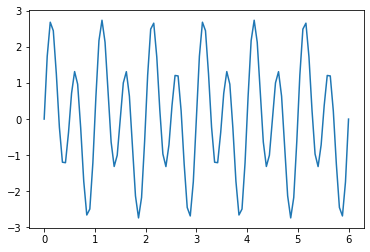

In [4]:
x = np.linspace(0, np.pi * 6, 101)

n = len(x)

L = max(x) - min(x)

y = 0. + 1.*np.sin(x * 2) + 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

#y = 1.0 * np.random.randn(len(x))

#x = np.linspace(-10, 10, 101)
#y = 5*np.exp(-10*x**2) * 0.

#y[x>-1.]=1
#y[x>1.]=0

#y[x>np.pi * 2] = 0.

#y[x>np.pi * 4] = 0.5 *np.sin(x [x>np.pi * 4]* 5)

print (x/(np.pi))

plt.plot(x/np.pi, y)

## Автокорреляционная функция

1.5369023279598125e-16


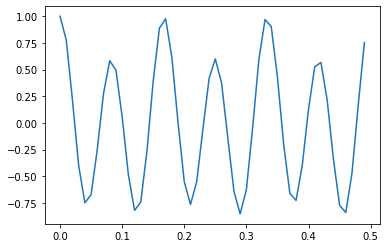

In [5]:
Ac = np.zeros (n)

y_av = np.sum(y)/n

print (y_av)

for k in range (0, n-1):
    
    Ac [k] = 0.
    
    for i in range (0, n-k-1):
        Ac[k] = Ac[k] + (y[i]-y_av)*(y[i+k]-y_av)/(n-k-1)
        
plt.plot (x[0:int(n/2)]/L, Ac[0:(int(n/2))]/Ac[0])       


# Оконное преобразование Фурье

## Исходные данные

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96 1.02 1.08 1.14 1.2  1.26 1.32 1.38 1.44 1.5  1.56 1.62
 1.68 1.74 1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46
 2.52 2.58 2.64 2.7  2.76 2.82 2.88 2.94 3.   3.06 3.12 3.18 3.24 3.3
 3.36 3.42 3.48 3.54 3.6  3.66 3.72 3.78 3.84 3.9  3.96 4.02 4.08 4.14
 4.2  4.26 4.32 4.38 4.44 4.5  4.56 4.62 4.68 4.74 4.8  4.86 4.92 4.98
 5.04 5.1  5.16 5.22 5.28 5.34 5.4  5.46 5.52 5.58 5.64 5.7  5.76 5.82
 5.88 5.94 6.  ]


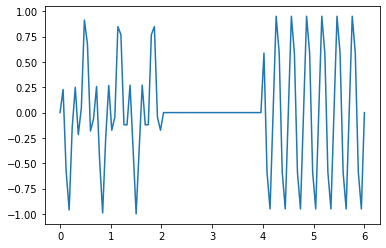

In [29]:
x = np.linspace(0, np.pi * 6, 101)

n = len(x)

L = max(x) - min(x)

y = np.cos(6 *x) * np.sin(3 * x) #+ 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 1. * np.sin( 10 * x [x>np.pi * 4]* 4)

print (x/(np.pi))

plt.plot(x/np.pi, y)

## Подвижное окно

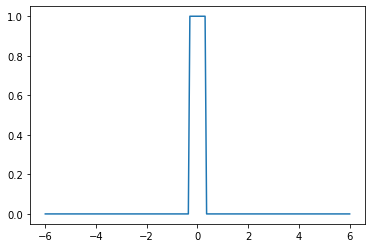

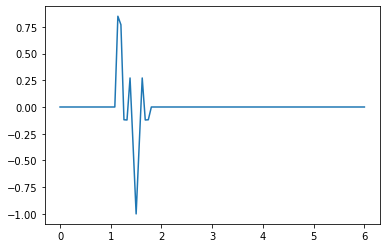

In [51]:
B = np.zeros ((len(x)))

dx = L / (n-1)

xw = np.linspace(-L, L, 201)

Win = np.zeros ((2*len(x)-1))

WinSize = np.pi / 3 #L #/3

Win[abs(xw)<WinSize] = 1.

plt.figure()
plt.plot (xw/np.pi, Win)

s = 25

for i in range (0,n-1):
             
    B[i] = y[i] * Win[i-s+n]                        
       
plt.figure ()    
plt.plot (x/np.pi, B)


## Оконное преобразование 1

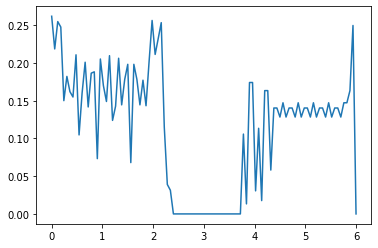

In [52]:
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

k = 2

for s in range (0,n-1): 
    
    a[s]=0.
    b[s]=0.
       
    for i in range (0,n-1):
    
        a[s] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
        b[s] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx 
        
        
plt.figure()
plt.plot(x/np.pi, (a**2+b**2)**0.5)
    

## Оконное преобразование 2

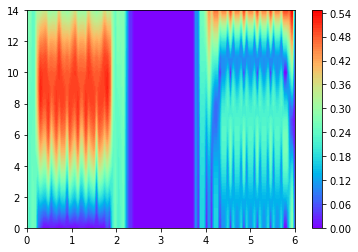

In [53]:
nf = 15

a2 = np.zeros((n,nf))
b2 = np.zeros((n,nf))
A2 = np.zeros((n,nf))

Freq = np.zeros ((len(x)))
Shift = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

for k in range (0,nf):
    
    Freq [k] = k

    for s in range (0,n-1):
        
        Shift[s] = s
    
        a2[s,k]=0.
        b2[s,k]=0.
       
        for i in range (0,n-1):
    
            a2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
            b2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx
        
                                   
A2 = (a2**2+b2**2)**0.5 


plt.figure()
plt.contourf(x/np.pi, Freq[0:15], A2.T, 100, cmap='rainbow')
plt.colorbar()